In [122]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
Goal4 = pd.read_excel('Goal4.xlsx')

In [22]:
Goal4.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.0,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.0,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.5,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.5,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.0,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = Goal4.loc[:, ~Goal4.columns.str.contains('^Unnamed')]

In [29]:
df.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Reporting Type', 'Sex', 'Type of skill',
       'Units'],
      dtype='object')

### Columns Removed

In [31]:
df = df.drop(["Goal", "TimeCoverage", "UpperBound", "LowerBound", "GeoInfoUrl", "Reporting Type", "Time_Detail", "GeoAreaCode", "Source", "SeriesDescription", "BasePeriod", "Age"], axis=1)

In [36]:
df.columns

Index(['Target', 'Indicator', 'SeriesCode', 'GeoAreaName', 'TimePeriod',
       'Value', 'BasePeriod', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Sex', 'Type of skill', 'Units'],
      dtype='object')

In [35]:
df.describe()

,TimePeriod,Value,BasePeriod
count,191762.000000,179570.000000,2276.0
mean,2010.212284,41.595042,2018.0
std,5.169051,41.230603,0.0
min,2000.000000,0.000000,2018.0
25%,2006.000000,1.001600,2018.0
50%,2011.000000,34.134145,2018.0
75%,2015.000000,83.482727,2018.0
max,2020.000000,1632.065770,2018.0


## Filter and work on the country of focus

#### These countries can be spelt differently sometimes in the dataset (Example Congo Dem. Rep. can also be spelt out as Congo Democratic Republic)

In [60]:
#Country of focus
countries = ['Democratic Republic of the Congo', 'Micronesia', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [6]:
for i,j in enumerate(countries):
    print(i,j)

0 Afghanistan
1 Albania
2 Algeria
3 Angola
4 Antigua and Barbuda
5 Argentina
6 Armenia
7 Azerbaijan
8 Bangladesh
9 Belarus
10 Belize
11 Benin
12 Bhutan
13 Bolivia
14 Bosnia and Herzegovina
15 Botswana
16 Brazil
17 Bulgaria
18 Burkina Faso
19 Burundi
20 Cabo Verde
21 Cambodia
22 Cameroon
23 Central African Republic
24 Chad
25 Chile
26 China
27 Colombia
28 Comoros
29 Congo
30 Congo, Democratic Republic
31 Costa Rica
32 Croatia
33 Côte d'Ivoire
34 Djibouti
35 Dominica
36 Dominican Republic
37 Ecuador
38 Egypt
39 El Salvador
40 Equatorial Guinea
41 Eritrea
42 Eswatini
43 Ethiopia
44 Fiji
45 Gabon
46 Gambia
47 Georgia
48 Ghana
49 Grenada
50 Guatemala
51 Guinea
52 Guinea-Bissau
53 Guyana
54 Haiti
55 Honduras
56 India
57 Indonesia
58 Iran (Islamic Republic of)
59 Iraq
60 Jamaica
61 Jordan
62 Kazakhstan
63 Kenya
64 Kiribati
65 Kosovo
66 Kyrgyzstan
67 Lao People's Democratic Republic
68 Lebanon
69 Lesotho
70 Liberia
71 Libya
72 Madagascar
73 Malawi
74 Malaysia
75 Maldives
76 Mali
77 Marshall Is

In [56]:
df["Education level"].value_counts()

LOWSEC    58485
PRIMAR    54631
UPPSEC    51585
PREPRI     3613
SECOND     3414
GRAD23     2007
_T          148
Name: Education level, dtype: int64

# One-hot encoding the columns

In [37]:
df.head()

,Target,Indicator,SeriesCode,GeoAreaName,TimePeriod,Value,BasePeriod,FootNote,Age,Education level,Location,Nature,Quantile,Sex,Type of skill,Units
0,4.1,4.1.1,SE_TOT_PRFL,Afghanistan,2013,11.0,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,BOTHSEX,SKILL_MATH,PERCENT
1,4.1,4.1.1,SE_TOT_PRFL,Afghanistan,2013,13.0,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,BOTHSEX,SKILL_READ,PERCENT
2,4.1,4.1.1,SE_TOT_PRFL,Afghanistan,2016,21.5,NaN,NaN,NaN,GRAD23,NaN,C,NaN,MALE,SKILL_READ,PERCENT
3,4.1,4.1.1,SE_TOT_PRFL,Afghanistan,2016,22.5,NaN,NaN,NaN,GRAD23,NaN,C,NaN,FEMALE,SKILL_READ,PERCENT
4,4.1,4.1.1,SE_TOT_PRFL,Afghanistan,2016,22.0,NaN,NaN,NaN,GRAD23,NaN,C,NaN,BOTHSEX,SKILL_READ,PERCENT


In [44]:
df.columns

Index(['Target', 'Indicator', 'SeriesCode', 'GeoAreaName', 'TimePeriod',
       'Value', 'BasePeriod', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Sex', 'Type of skill', 'Units'],
      dtype='object')

In [45]:
df.describe()

,TimePeriod,Value,BasePeriod
count,191762.000000,179570.000000,2276.0
mean,2010.212284,41.595042,2018.0
std,5.169051,41.230603,0.0
min,2000.000000,0.000000,2018.0
25%,2006.000000,1.001600,2018.0
50%,2011.000000,34.134145,2018.0
75%,2015.000000,83.482727,2018.0
max,2020.000000,1632.065770,2018.0


### Extract information from Footnote

## Retaining only given countries

In [63]:
df_requiredcountries = df[df.GeoAreaName.isin(countries)]

In [65]:
print(df_requiredcountries.shape)
df_requiredcountries.to_csv("required_countries_dataframe.csv")

(152207, 16)


In [76]:
categorical_columns = ["Target", "Indicator", "SeriesCode", "GeoAreaName", "Education level", "Location",
       "Nature", "Quantile", "Sex", "Type of skill", "Units"]

In [77]:
df_dummies = df_requiredcountries

In [78]:
df_requiredcountries.columns

Index(['Target', 'Indicator', 'SeriesCode', 'GeoAreaName', 'TimePeriod',
       'Value', 'BasePeriod', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Sex', 'Type of skill', 'Units'],
      dtype='object')

In [79]:
for col in categorical_columns:
    df_dummies = pd.concat([df_dummies.drop([col], axis=1), pd.get_dummies(df_dummies[col], prefix=col)], axis=1)

In [80]:
df_dummies.head()

,TimePeriod,Value,BasePeriod,FootNote,Age,Target_4.1,Target_4.2,Target_4.3,Target_4.4,Target_4.5,...,Type of skill_LITE,Type of skill_NUME,Type of skill_PCPR,Type of skill_SKILL_MATH,Type of skill_SKILL_READ,Type of skill_SOFT,Type of skill_TRAF,Units_CON_USD,Units_PERCENT,Units_Ratio
0,2013,11.0,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2013,13.0,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2016,21.5,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2016,22.5,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2016,22.0,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [82]:
df_dummies.to_csv("onehotencoded_requiredcountries_v2.csv")

# Cleaning Function

In [86]:
def clean_data(df, columns_removed, countries_retained):
    # Remove Unnamed columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Remove columns
    # columns_removed = ["Goal", "TimeCoverage", "UpperBound", "LowerBound", "GeoInfoUrl", "Reporting Type", "Time_Detail", "GeoAreaCode", "Source", "SeriesDescription", "BasePeriod", "Age"]
    df = df.drop(columns_removed, axis=1)
    
    # Retain the required countries
    df = df[df.GeoAreaName.isin(countries_retained)]
    
    return df

# Main Function

In [148]:
columns_removed = ["Goal", "TimeCoverage", "UpperBound", "LowerBound", "GeoInfoUrl", "Reporting Type", "Time_Detail", "GeoAreaCode", "Source", "SeriesDescription", "BasePeriod", "Age"]
countries = ['Democratic Republic of the Congo', 'Micronesia', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 
             'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 
             'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

df_cleaned = clean_data(Goal4, columns_removed, countries)
print(df_cleaned.shape)
print(df_cleaned.columns)

(152207, 14)
Index(['Target', 'Indicator', 'SeriesCode', 'GeoAreaName', 'TimePeriod',
       'Value', 'FootNote', 'Education level', 'Location', 'Nature',
       'Quantile', 'Sex', 'Type of skill', 'Units'],
      dtype='object')


In [151]:
df_cleaned.columns

Index(['Target', 'Indicator', 'SeriesCode', 'GeoAreaName', 'TimePeriod',
       'Value', 'FootNote', 'Education level', 'Location', 'Nature',
       'Quantile', 'Sex', 'Type of skill', 'Units'],
      dtype='object')

In [169]:
# Cutting out the footnote
df_cleaned[["FootNote"]].shape

(152207, 1)

In [167]:
pd.concat([df_scaled, df_cleaned[["FootNote"]]], axis=1).shape

(172758, 14)

In [168]:
df_scaled.shape

(152207, 13)

In [172]:
df_imputed = pd.read_csv("Imputed_KNN1.csv")

In [173]:
df_imputed.head()

,Unnamed: 0,Value,target_variable,SeriesCode_DC_TOF_SCHIPSL,SeriesCode_SE_ACC_HNDWSH,SeriesCode_SE_ACS_CMPTR,SeriesCode_SE_ACS_ELECT,SeriesCode_SE_ACS_H2O,SeriesCode_SE_ACS_INTNT,SeriesCode_SE_ACS_SANIT,...,Type of skill_LITE,Type of skill_NUME,Type of skill_PCPR,Type of skill_SKILL_MATH,Type of skill_SKILL_READ,Type of skill_SOFT,Type of skill_TRAF,Units_CON_USD,Units_PERCENT,Units_Ratio
0,0,0.110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,0.225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,0.220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [187]:
df_cleaned.FootNote.unique()

array([nan,
       'This data point is NOT APPLICABLE for the submitting nation.',
       'This should be treated as NIL.',
       'Based on youngest child aged 36-59 months in the household',
       'Based on oldest child aged 36-59 months in the household',
       'Based on youngest child aged 36-47 months in the household',
       'age 15-49',
       'Gross disbursements | Based on OECD, CRS databased, 2020 | Constant 2018 USD million'],
      dtype=object)

In [174]:
df_imputed["Footnote"] = df_cleaned[["FootNote"]]

In [190]:
df_imputed["TimePeriod"] = df_cleaned[["TimePeriod"]]

In [192]:
df_imputed_mod = df_imputed[~df_imputed.Footnote.isin(['This data point is NOT APPLICABLE for the submitting nation.',
       'This should be treated as NIL.'])]

In [191]:
df_imputed.shape

(152207, 213)

In [193]:
df_imputed_mod.to_csv("modified_imputed_data.csv")

### One hot encoding for categorical variables

In [140]:
df_scaled.columns

Index(['Unnamed: 0', 'Target', 'Indicator', 'SeriesCode', 'GeoAreaName',
       'TimePeriod', 'Value', 'Education.level', 'Location', 'Nature',
       'Quantile', 'Sex', 'Type.of.skill', 'Units'],
      dtype='object')

In [143]:
# df_scaled.rename(columns = {"Education.level": "Education level", "Type.of.skill": "Type of skill"}, 
#           inplace = True)
df_scaled = df_scaled.drop(["Unnamed: 0"], axis=1)

df_dummies = df_scaled
# Pick only categorical columns for one-hot encoding
categorical_columns = ["Indicator", "SeriesCode", "GeoAreaName", "Education level", "Location",
       "Nature", "Quantile", "Sex", "Type of skill", "Units"]

for col in categorical_columns:
    df_dummies = pd.concat([df_dummies.drop([col], axis=1), pd.get_dummies(df_dummies[col], prefix=col)], axis=1)

df_dummies.head()

,TimePeriod,Value,Target_4.1,Target_4.5,Target_4.1,Target_4.2,Target_4.3,Target_4.4,Target_4.5,Target_4.6,...,Type of skill_LITE,Type of skill_NUME,Type of skill_PCPR,Type of skill_SKILL_MATH,Type of skill_SKILL_READ,Type of skill_SOFT,Type of skill_TRAF,Units_CON_USD,Units_PERCENT,Units_Ratio
0,2013,0.110,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2013,0.130,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2016,0.215,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2016,0.225,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2016,0.220,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [144]:
df_dummies.to_csv("onehotencoded_scaled_cleaned.csv")
df_scaled.to_csv("cleaned_scaled_datav2.csv")

## Visualization of data

In [116]:
df_data = Goal4.loc[:, ~Goal4.columns.str.contains('^Unnamed')]
print(df_data.shape)

(191762, 26)


In [117]:
columns = df_data.columns

In [118]:
missingvalues = dict()
for feature in columns:
    missingvalues[feature] = df_data[feature].isnull().sum()

In [119]:
df = pd.DataFrame(list(missingvalues.items()))
df.columns =["Features","Count"]

# sort df by Count column
df = df.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

In [120]:
df.head()

,Features,Count
0,GeoInfoUrl,191762
1,TimeCoverage,191762
2,UpperBound,191762
3,LowerBound,191762
4,Age,191281


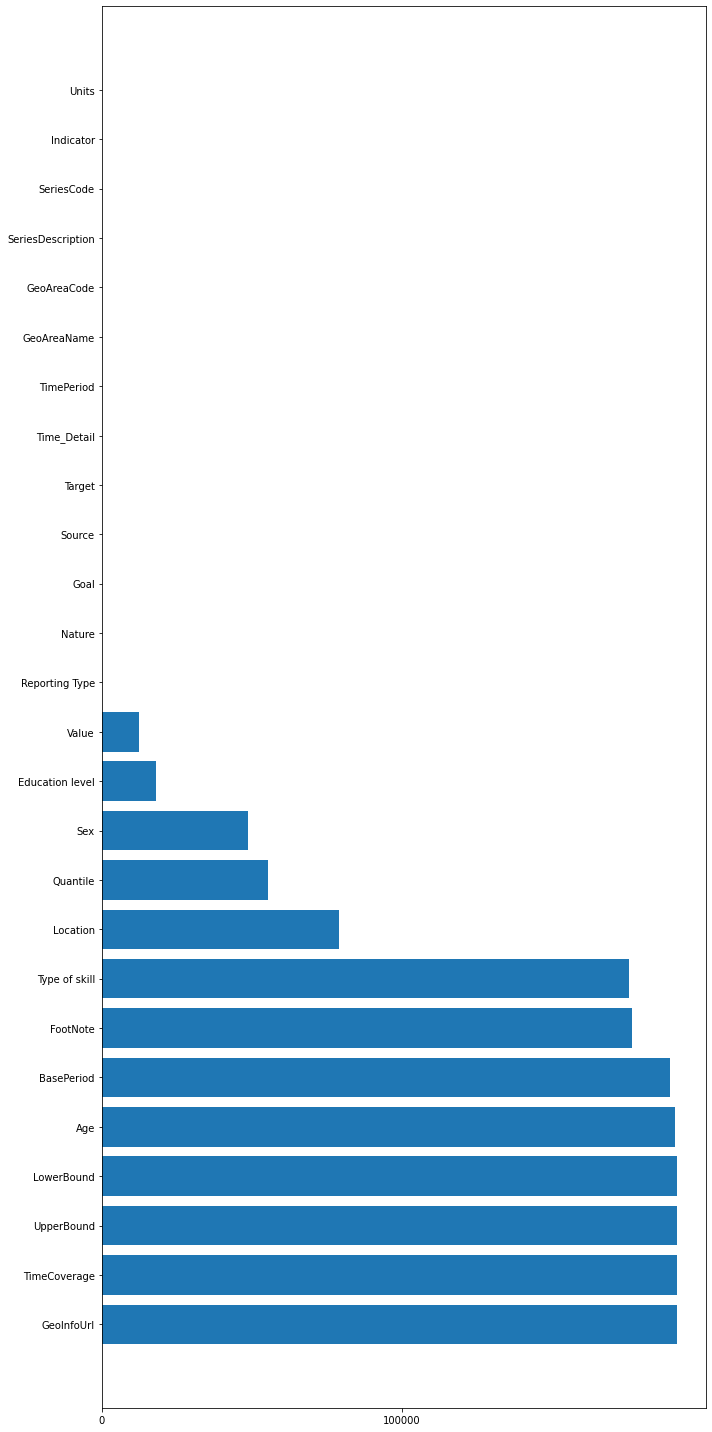

In [130]:
plt.figure(figsize=(10,20))
scalar_points = [*range(len(df["Features"].values))]
plt.barh(scalar_points, df["Count"].values)
plt.yticks(scalar_points, df["Features"].values)
plt.xticks(np.arange(min(df["Count"].values), max(df["Count"].values)+1, 100000))

plt.tight_layout()
plt.savefig("missing_values.png", dpi=100)
plt.show()

In [126]:
plt.savefig("missing_values.png")

<Figure size 432x288 with 0 Axes>

### Analysis on missing information
1. Units, Indicator, SeriesCode, SeriesDescription, GeoAreaCode, GeoAreaName, TimePeriod, TimeDetail, Target, Source, Goal, Nature, Reporting Type have no missing values.
1. Even if "Footnote" has many missing values, the remaining information is crucial in removing unnecessary data.